## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.spatial.distance import cosine
from sklearn.linear_model import LinearRegression
%matplotlib inline

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [2]:
random_data = np.random.random((30, 1))
random_data

array([[0.33240791],
       [0.51904847],
       [0.10886879],
       [0.44334662],
       [0.66841456],
       [0.10957379],
       [0.43213774],
       [0.14983994],
       [0.6411111 ],
       [0.62941572],
       [0.73120039],
       [0.01121555],
       [0.20988393],
       [0.1895973 ],
       [0.89049042],
       [0.60583456],
       [0.22265374],
       [0.40577642],
       [0.44081074],
       [0.77179137],
       [0.09119539],
       [0.93481876],
       [0.47980218],
       [0.08767788],
       [0.05434016],
       [0.1707802 ],
       [0.4155398 ],
       [0.21202014],
       [0.94196516],
       [0.92249212]])

In [3]:
train_x = random_data[:24, 0]
test_x = random_data[24:, 0]

In [4]:
def assmuing_function(x):
    return 13.4 * x + 5 + random.randint(-3, 3)

In [5]:
train_y = [assmuing_function(x) for x in train_x]

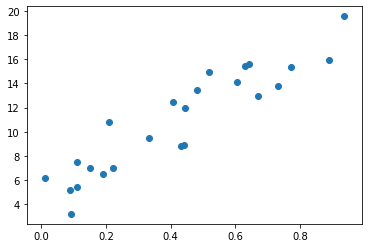

In [6]:
plt.scatter(train_x, train_y)

In [7]:
linear_model = LinearRegression()

In [9]:
linear_model.fit(train_x.reshape(-1, 1), np.array(train_y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
coef = linear_model.coef_[0]
intercept = linear_model.intercept_
print(f"The coef is {round(coef, 4)} and the intercept is {round(intercept, 4)}")

The coef is 14.6269 and the intercept is 4.7333


In [12]:
y_predict = linear_model.predict(test_x.reshape(-1, 1))
y_predict

array([ 5.52815504,  7.23131162, 10.81138534,  7.83452392, 18.51135533,
       18.22652511])

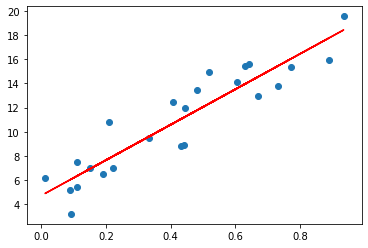

In [13]:
train_y_pred = linear_model.predict(train_x.reshape(-1, 1))
plt.scatter(train_x, train_y)
plt.plot(train_x, train_y_pred, color='red')

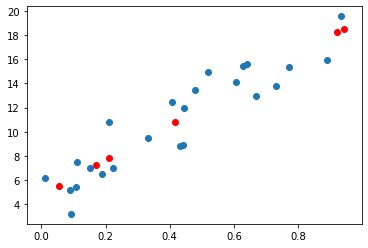

In [14]:
plt.scatter(train_x, train_y)
plt.scatter(test_x, y_predict, color='red')

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [16]:
def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [17]:
def distance(x1, x2):
    return cosine(x1, x2)

In [30]:
def predict(x, k=5):
    most_similars = sorted(model(train_x, train_y), key=lambda xi: distance(xi[0], x))[:k]
    #回归问题
    if all(isinstance(y, float) for y in train_y):
        y_predict = sum(i[1] for i in most_similars) / k
    #分类问题
    elif all(isinstance(y, str) for y in train_y) or all(isinstance(y, int) for y in train_y):
        y_predict = stats.mode(most_similars)[0][0]
    else:
        raise Exception('Wrong type of y')
    return y_predict

In [32]:
KNN_y_predict = [predict(x) for x in test_x]
KNN_y_predict

[9.14064882288032,
 9.861466359637626,
 7.473858278421325,
 9.800879852301629,
 10.472456880051608,
 10.784978666357782]

##### 好像有问题，预测的结果差太远= =

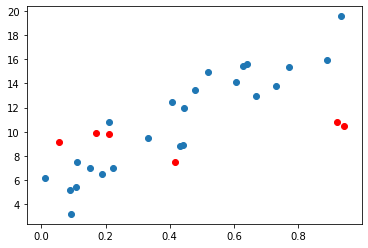

In [33]:
plt.scatter(train_x, train_y)
plt.scatter(test_x, KNN_y_predict, color='red')

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
KNN_model = KNeighborsRegressor(n_neighbors=5)

In [41]:
KNN_model.fit(train_x.reshape(-1, 1), np.array(train_y))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [43]:
KNN_model_y_predict = KNN_model.predict(test_x.reshape(-1, 1))
KNN_model_y_predict

array([ 5.49486414,  7.76255054, 11.10102152,  7.76255054, 15.51119752,
       15.51119752])

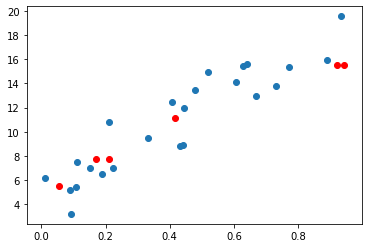

In [44]:
plt.scatter(train_x, train_y)
plt.scatter(test_x, KNN_model_y_predict, color='red')

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [49]:
from collections import Counter
from icecream import ic
import pandas as pd

In [50]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [51]:
dataset = pd.DataFrame.from_dict(mock_data)
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [46]:
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in elements]
    return - sum(p * np.log(p) for p in probs)

In [56]:
def find_the_min_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        #ic(f)
        values = set(training_data[f])
        #ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            #ic(sub_spliter_1)
            entropy_1 = entropy(sub_spliter_1)
            #ic(entropy_1)
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            #ic(sub_split_2)
            entropy_2 = entropy(sub_spliter_2)
            #ic(entropy_2)
            entropy_v = entropy_1 + entropy_2
            #ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

#### 持续的特征选则不太会

In [63]:
def choose_feature_by_salience(training_data: pd.DataFrame, target: str):
    all_feature = list(set(training_data.columns.tolist()) - {target})
    sorted_feature = []
    
    choosed_feature, choosed_feature_value = find_the_min_spilter(training_data, target)
    sorted_feature.append(choosed_feature)
    
    while all_feature:
        all_feature.remove(choosed_feature)
        choosed_feature, choosed_feature_value = find_the_min_spilter(training_data[training_data[choosed_feature] != choosed_feature_value], target)
        sorted_feature.append(choosed_feature)
    
    return sorted_feature

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [75]:
from sklearn.cluster import KMeans
from collections import defaultdict

In [69]:
X = [random.randint(0, 100) for _ in range(100)]
Y = [random.randint(0, 100) for _ in range(100)]

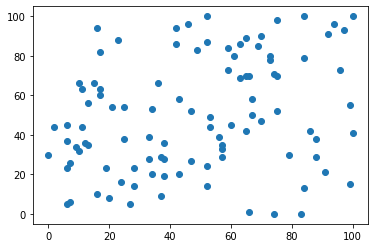

In [70]:
plt.scatter(X, Y)

In [72]:
trainning_data = [[x, y] for x, y in zip(X, Y)]

In [73]:
KMeans_model = KMeans()

In [74]:
KMeans_model.fit(trainning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

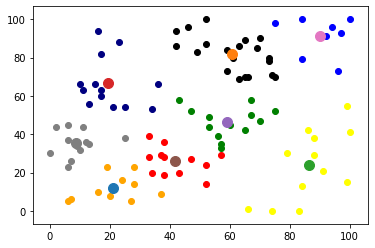

In [76]:
pred_cluster = KMeans_model.labels_
centers = defaultdict(list)

for label, location in zip(pred_cluster, trainning_data):
    centers[label].append(location)
    
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange', 'blue', 'navy']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in KMeans_model.cluster_centers_:
    plt.scatter(*center, s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:根据现有特征的组合进行决策并预测结果；选择出来的特征无法反映事件的100%真实情况，多少都会有偏差，较好的模型可以更大程度地拟合特征数据并做出较好的预测

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:欠拟合对特征数据拟合不足，模型的复杂程度过低，偏差过大；过拟合则拟合过度，模型的复杂程度过高，缺少泛化能力，方差过大。欠拟合可能的原因有特征过少，模型过于简单；过拟合可能的原因有数据不足，数据有比较严重的噪点，模型训练过度，训练集与测试集特征分布不一致

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

precision：预测为正例里面有多少是真正的正例，精准率代表对正样本结果中的预测准确程度，查准率
recall：真正的所有正例里正确预测出多少正例，希望正例被更多的找出来，宁可错杀一千，绝不放过一个，查全率
AUC：受试者特征曲线下的面积，衡量二分类问题的泛化能力，应对数据不平衡
F1：同时考虑查全率与查准率，让两者尽可能同时高
F2：调整了公式的系数，使得更加看重recall

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:通过对现有特征数据进行学习总结“规律”，再应用到新的特征数据并做出预测

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

正确定义了机器学习模型的评价标准确定了模型的目标，另外也要选择训练足够好的模型

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

### 这几天时间有些紧，之后会补上的！

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [ ]:
# you code here

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)